## ISMT S-136 Time Series Analysis with Python, Summer 2021  
### Section 7

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf

## Estimating One-step-ahead Prediction Error $P_{n+1}^n$

In [8]:
# set parameters of AR(2) process:
phi =   np.array([1.8, -0.9])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   80
Model:                     ARMA(2, 0)   Log Likelihood                 -94.329
Method:                           css   S.D. of innovations              0.811
Date:                Fri, 16 Oct 2020   AIC                            196.657
Time:                        16:18:48   BIC                            206.084
Sample:                             2   HQIC                           200.431
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3518      0.797      1.696      0.094      -0.210       2.914
ar.L1.y        1.6805      0.072     23.325      0.000       1.539       1.822
ar.L2.y       -0.7965      0.074    -10.726      0.0

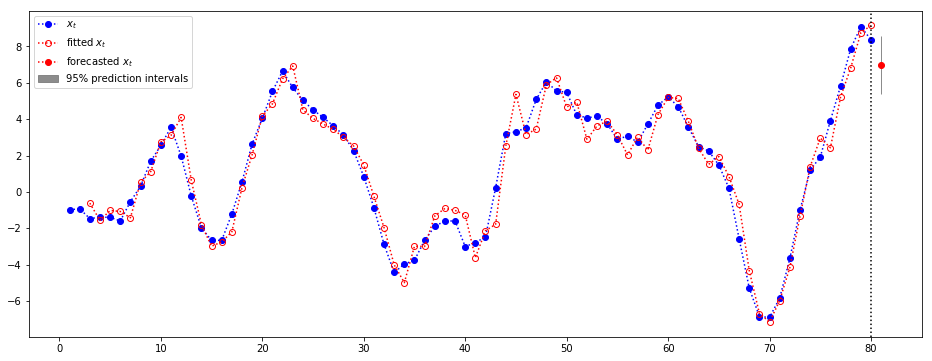

In [9]:
n=80
np.random.seed(1678)
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

# estimate parameters of AR(2) based on the sample run xt of n observations
p = 2
model = ARIMA(xt, order=(p,0,0))
model_fit = model.fit(method='css')
print(model_fit.summary())

# check n fitted values
xt_fitted = model_fit.predict()
plt.figure(figsize=(16,6))
plt.plot(range(1,n+1),xt,linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(range(p+1,n+1),xt_fitted,linestyle=':', marker='o', mfc='none', color='red',label = "fitted $x_t$")

# forecast m steps ahead starting from n+1
m=1
#xt_forecasted = model_fit.predict(start=n, end=n+m-1)
[xt_forecasted,std_error,pred_int] = model_fit.forecast(steps=m, exog=None, alpha=0.05)
plt.axvline(x=n,linestyle=':',color='k')
plt.plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$")
plt.fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.9,label = "95% prediction intervals")
plt.legend(loc = 'upper left')

print("\nxt forecasted = ",xt_forecasted)
print("st. error = ",std_error)
print("prediction interval is = ",pred_int)

C:\Users\dmk620\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dmk620\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dmk620\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dmk620\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dmk620\AppData\Local\Continuum\anaconda3\lib\site-packages\stat

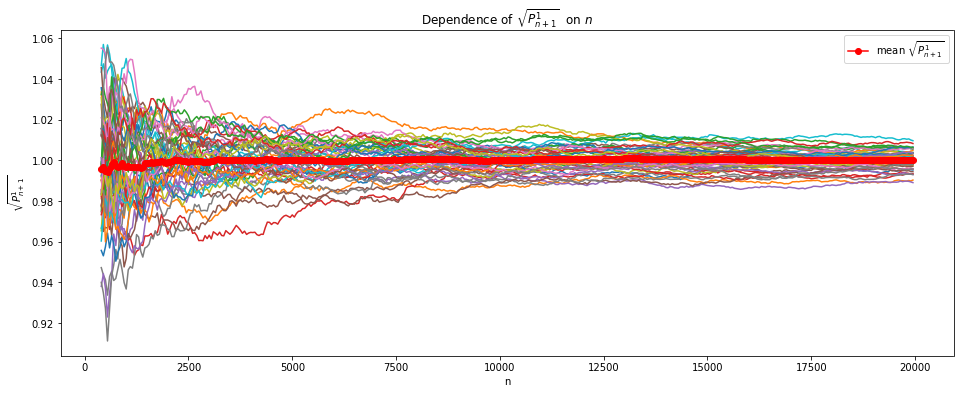

In [142]:
p = 2
ns = range(400,20000,50)
std_error_mean = np.zeros(len(ns))
N = 1

plt.figure(figsize=(16,6))
for trial in range(1,50):
    std_errors = []
    k = 0
    for n in ns:
        np.random.seed(trial^2)
        xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)
        model = ARIMA(xt, order=(p,0,0))
        model_fit = model.fit(method='css')
        [xt_forecasted,std_error,pred_int] = model_fit.forecast(steps=1, exog=None, alpha=0.05)
        std_errors.append(std_error)
        std_error_mean[k] = std_error_mean[k] + (std_error - std_error_mean[k])/N
        k = k + 1
    N = N + 1
    plt.plot(ns,std_errors,linestyle='-', marker="None")

plt.title("Dependence of $\sqrt{P_{n+1}^1}$  on $n$")
plt.xlabel("n")
plt.ylabel("$\sqrt{P_{n+1}^1}$")
plt.plot(ns,std_error_mean,linestyle='-', marker="o",color = "r", label = "mean $\sqrt{P_{n+1}^1}$")
plt.legend(loc = 'upper right')


## Identifying p and q of ARMA(p,q) Process: Residual Analysis

In [174]:
# generate n observations of AR(3)
phi =   np.array([1.4, -0.5])
theta = np.array([-1.2,0.8])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]

arma_process = smt.ArmaProcess(ar, ma)
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)
print("\n")
    
np.random.seed(1678)
sigma = 1.0
n=800
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

Is the process causal?      Answer: True
Is the process invertible?  Answer: True




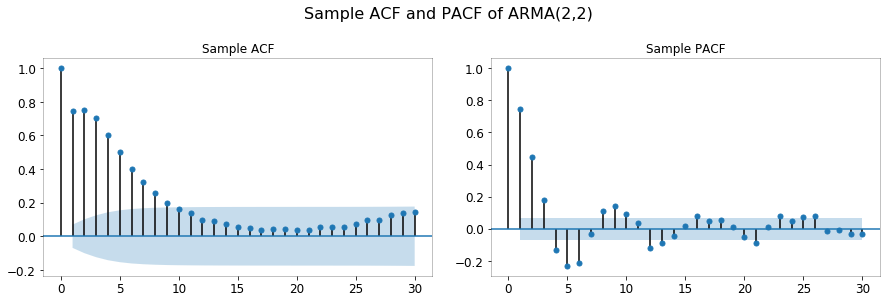

In [175]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Sample ACF and PACF of ARMA(2,2)',y=1.06,size=16)
plt.subplots_adjust(wspace = 0.15)
plot_acf(xt, ax=ax[0], lags=h_max)
plot_pacf(xt, ax=ax[1], lags=h_max)

for k in range(2):
    ax[k].tick_params(axis='both', labelsize=12)
    [ax[k].spines[line].set_alpha(.3) for line in ["top","bottom","right","left"]]

ax[0].set_title("Sample ACF")
ax[1].set_title("Sample PACF")   

plt.show()

In [176]:
# estimating parameters of AR(p), p=1,2,3,4, based on the sample run xt of n observations (equivalent to above cell)
p = [0,1,1,1,2,2,2,3]
q = [1,0,1,2,1,2,3,2]
res = [ARIMA(xt, order=(p[case],0,q[case])).fit(method='css').resid for case in range(len(p))]

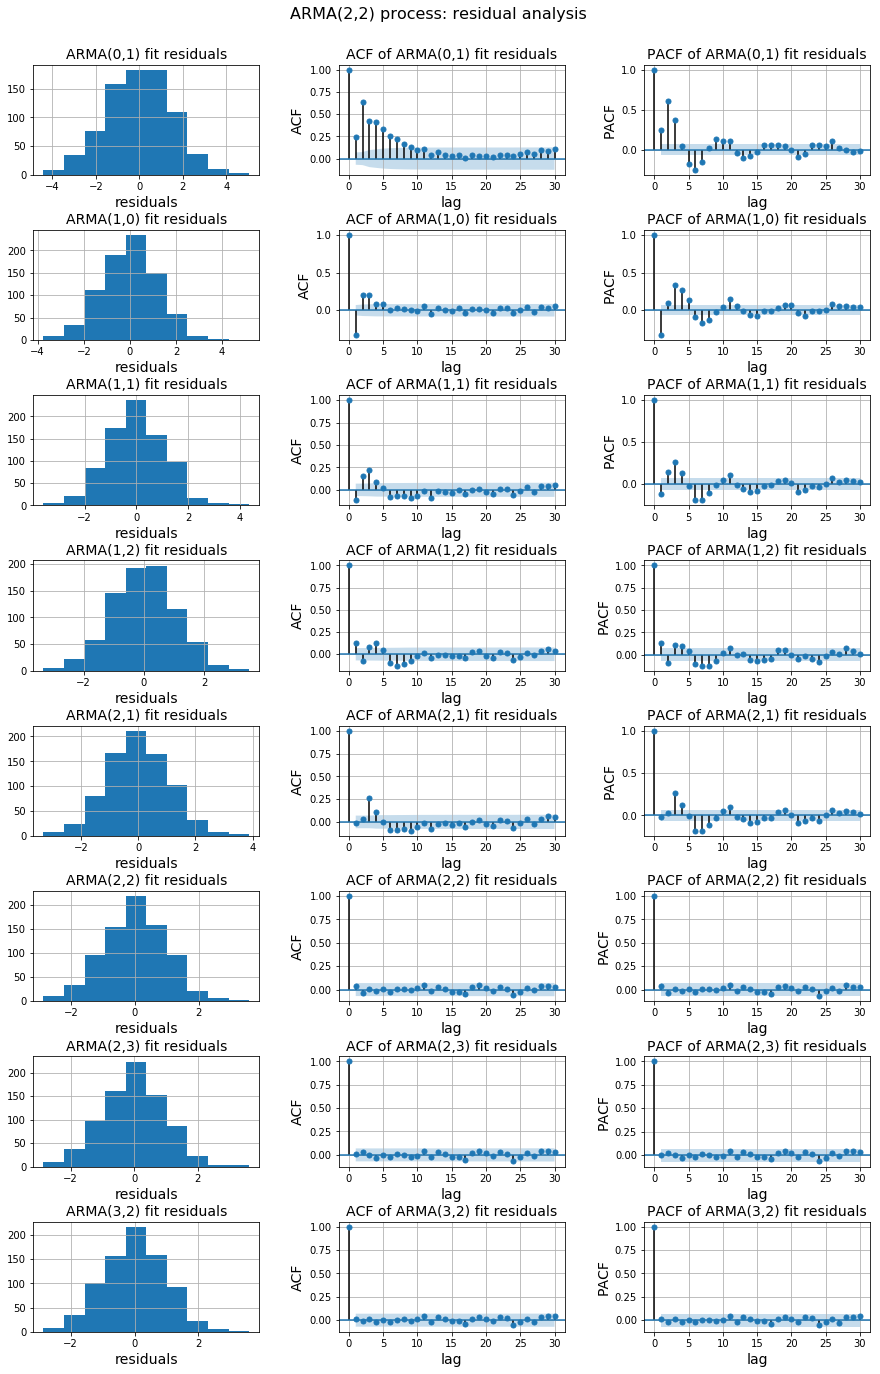

In [177]:
h_max = 30

fig, ax = plt.subplots(nrows=len(p), ncols=3, sharex=False, figsize=(15,20))
fig.suptitle("ARMA(2,2) process: residual analysis",y=0.92,size=16)
plt.subplots_adjust(wspace = 0.35,hspace = 0.5,bottom = 0)

for case in range(len(p)):
    ax[case][0].hist(res[case])
    ax[case][0].set_xlabel("residuals",fontsize=14)
    ax[case][0].set_title("ARMA(" + str(p[case]) + "," + str(q[case]) + ") fit residuals",fontsize=14)
    ax[case][0].grid(True)

    plot_acf(res[case], ax=ax[case][1], lags=h_max)
    ax[case][1].set_xlabel("lag",fontsize=14)
    ax[case][1].set_ylabel("ACF",fontsize=14)
    ax[case][1].set_title("ACF of ARMA(" + str(p[case]) + "," + str(q[case]) + ") fit residuals",fontsize=14)
    ax[case][1].grid(True)
    
    plot_pacf(res[case], ax=ax[case][2], lags=h_max)
    ax[case][2].set_xlabel("lag",fontsize=14)
    ax[case][2].set_ylabel("PACF",fontsize=14)
    ax[case][2].set_title("PACF of ARMA(" + str(p[case]) + "," + str(q[case]) + ") fit residuals",fontsize=14)
    ax[case][2].grid(True)